<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT24/blob/Widen00-Lab4/Lab4/Widen00_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 4: Integration**
**Joel Widén**

# **Abstract**

This report is investing how to utilize quadrature rules for integrating functions numerically. Both one dimensional and multidimensional integrals will be calculated using gauss quadrature and monte carlo methods.

The calculations show that the integrals are exact for a certain degree of function in the case of gauss quadrature and converge according to theory in the monte carlo method.

#**About the code**

This is a report in the course DD2363 Methods in Scientific Computing. The author of this file is Joel Widén, joelwid@kth.se.

In [1]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np
import random as rn

#try:
#    from dolfin import *; from mshr import *
#except ImportError as e:
#    !apt-get install -y -qq software-properties-common
#    !add-apt-repository -y ppa:fenics-packages/fenics
#    !apt-get update -qq
#    !apt install -y --no-install-recommends fenics
#    from dolfin import *; from mshr import *

#import dolfin.common.plotting as fenicsplot

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

Numbered algorithms, equations and chapter references used in this report is from the DD2363 course book Methods in Computational Science by Johan Hoffman if not stated otherwise.

Quadrature is a method of approximating integrals, and is sometimes used synonomously. In this lab gauss quadrature and the monte carlo method will be investigated.

This will be done by solving the following assignments:

*Assignment 1:* Function: 2-point Gauss quadrature over a unit interval

* *Input:* function $f(x)$
* *Output:* quadrature approximation of integral $\int_0^1 f(x) dx$
* *Test:* verify exact integration of cubic polynomials $ax^3 + bx^2 + cx + d$

*Assignment 2:* Function: 3-point edge midpoint quadrature over a reference triangle

* *Input:* function $f(x)$
* *Output:* quadrature approximation of integral $\int_{ref-triangle} f(x) dx$
* *Test:* verify exact integration of quadratic polynomials $ax^2 + by^2 + cxy + dx + ey + f$

*Assignment 3:* Function: Monte Carlo quadrature over a unit interval
* *Input:* function $f(x)$
* *Output:* MC quadrature approximation of integral $\int_0^1 f(x) dx$
* *Test:* verify convergence rate $\frac{1}{\sqrt(n)}$ with respect to number of quadrature points $n$.



# **Method**

**Assignment 1**

This assignment is using the result from example 11.3 and then using the map from problem assignment 11.3 to construct the quadrature.

In [2]:
#Assignment 1

class func:
  def __init__(self):
    self.c = [1, 1, 1, 1]
    self.fx = self.f
    self.Fx = self.F

  def f(self, x):
    c = self.c
    fx = c[0]*(x**3) + c[1]*(x**2) + c[2]*x + c[3]
    return fx

  #Without integration constant
  def F(self, x):
    c = self.c
    Fx =(c[0]/4)*(x**4) + (c[1]/3)*(x**3) + (c[2]/2)*(x**2) + c[3]*x
    return Fx

#From example 11.3 but remapped using the results from problem assignment 11.3
def two_point_gauss(f):
  w0 = 1/2
  w1 = w0
  x0 = (1/2)*(1/np.sqrt(3) + 1)
  x1 = (1/2)*(-1/np.sqrt(3) + 1)

  fx_g = w0 * f(x0) + w1 * f(x1)
  return fx_g

f = func().fx
F = func().Fx
two_point = two_point_gauss(f)
exact_two_point = F(1) - F(0)
diff1 = abs(two_point - exact_two_point)

**Assignment 2**

This assignment uses the result from example 11.5. This is implemented in the same way as the previous assignment. The difference is that this is done with two variables over a reference rectangle.



In [3]:
#Assignment 2

class func:
  def __init__(self):
    self.c = [1, 1, 1, 1, 1, 1]
    self.fxy = self.f
    self.Fxy = self.F

  def f(self, x, y):
    c = self.c
    fxy = c[0]*(x**2) + c[1]*(y**2) + c[2]*x*y + c[3]*x + c[4]*y + c[5]
    return fxy

  #Without integration constant, over reference triangle area. Parametrized accordingly
  def F(self, x):
    c = self.c
    A = c[0] * (x**3 / 3 - x**4 / 4)
    B = c[1] * (x / 3 - x**2 / 2 + x**3 / 3 - x**4 / 12)
    C = c[2] * (x**2 / 4 - x**3 / 3 + x**4 / 8)
    D = c[3] * (x**2 / 2 - x**3 / 3)
    E = (c[4]/2) * (x - x**2 + x**3 / 3)
    F = c[5] * (x - x**2 / 2)
    Fxy =  A + B + C + D + E + F
    return Fxy


def three_point_edge(f):
  w0 = 1/6
  w1 = w0
  w2 = w0
  v0 = [1/2, 0]
  v1 = [0, 1/2]
  v2 = [1/2, 1/2]
  fxy_tp = (w0 * f(v0[0], v0[1])) + (w1 * f(v1[0], v1[1])) + (w2 * f(v2[0], v2[1]))

  return fxy_tp

f = func().fxy
F = func().Fxy

three_point = three_point_edge(f)
exact_three_point = F(1) - F(0)
diff2 = abs(three_point - exact_three_point)


**Assignment 3**

This assignment is using equation 12.3 to integrate a function using the monte carlo method.

In [4]:
# Assignment 3

class func:
  def __init__(self):
    self.c = [1, 1, 1, 1]
    self.fx = self.f
    self.Fx = self.F

  def f(self, x):
    c = self.c
    fx = c[0]*(x**3) + c[1]*(x**2) + c[2]*x + c[3]
    return fx

  #Without integration constant
  def F(self, x):
    c = self.c
    Fx =(c[0]/4)*(x**4) + (c[1]/3)*(x**3) + (c[2]/2)*(x**2) + c[3]*x
    return Fx


def monte_carlo(f, n):
  F_vec = np.zeros(n)
  sum = 0
  for i in range(1, n+1):
    xi = rn.random()
    sum += f(xi)
    F = sum/i
    F_vec[i-1] = F
  return F, F_vec

F = func().Fx
f = func().fx
exact_int = F(1)-F(0)

runs = 100
n = 10000
error_matrix = np.zeros((runs, n))

for i in range(0, runs):
  mc_int, mc_int_vec = monte_carlo(f, n)
  error_vec = abs(mc_int_vec - exact_int)
  error_matrix[i][:] = error_vec

n_vec = np.arange(1,n+1,1)


# **Results**

Assignment 1
Two point gauss rule over unit interval:  2.083333333333333
Exact solution over unit interval:  2.083333333333333
Difference between solutions:  0.0


Assignment 2
Solution using the three point rule for reference triangle:  1.0416666666666665
Exact solution over reference triangle:  1.0416666666666665
Difference between solutions:  0.0


Assignment 3


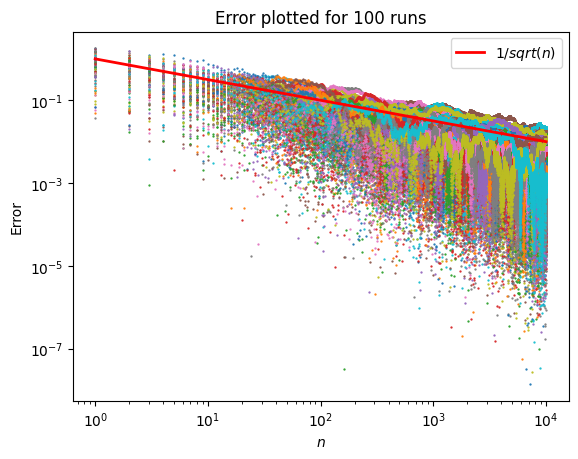

In [5]:
# Plot and print results

#Assignment 1
print("Assignment 1")
print("Two point gauss rule over unit interval: ",two_point)
print("Exact solution over unit interval: ", exact_two_point)
print("Difference between solutions: ", diff1)
print("\n")

#Assignment 2
print("Assignment 2")
print("Solution using the three point rule for reference triangle: ", three_point)
print("Exact solution over reference triangle: ", exact_three_point)
print("Difference between solutions: ", diff2)
print("\n")


#Assignment 3
#Plot F-F_exat over n and 1/sqrt(n) in the same plot to verify convergence
print("Assignment 3")
plt.figure(1)
plt.loglog(n_vec, 1/np.sqrt(n_vec), label="$1/sqrt(n)$", linewidth=2, c="red")
for i in range(0, runs):
  plt.scatter(n_vec, error_matrix[i], s=0.4)
plt.title("Error plotted for "+ str(runs) + " runs")
plt.xlabel("$n$")
plt.ylabel("Error")
plt.legend()
plt.show()
print("\n")

# **Discussion**

All assignments are showing expected results.

 In assignment 1 the answer is exactly equal to doing normal integration. This is because this type of quadrature is exact for all cubic polynomials (chapter 11.3).

 Assignment 2 is, as with assignment 1, the same as the exact integral. This is due to the quadrature having three points so the quadrature is exact for polynomials of $2q + 1$ order (chapter 11.3).

 Assignment 3 is converging at the expected rate which can be seen in the figure. This has quite large variations so a lot of runs was made to be able to more clearly see the pattern.